# Linear Regression From Scratch: Gradient Descent & Ordinary Least Squares

Author: **Marcin Sikorski**<br>
Date: January, 2024

A simple demonstration of a linear regression solutions built from scratch, without using advanced frameworks. We will develop basic regression models and compare their evaluation results with those from the LinearRegression method in scikit-learn.

### 1. Generating Data

To perform linear regression, we need to generate some random training data while maintaining linearity. When the function is of only one variable (simple regression), it is of the form:

$$ f(y) = ax + b$$ or $$y = mx + c,$$

where $m$ is the slope and $c$ is the intercept (or bias). Both are constants and describe the direction of the line on a plane. These are the parameters to be learned by the regression model.

The idea of linear regression is to fit a line to scattered data points in such a way that it minimizes the difference between the observed data and the predicted values, a line that will best describe the relationship. It returns the new values of $m$ and $c$.

In [1]:
import numpy as np
np.random.seed(42)

# intialize arbitrary slope & intercept
m = 2
c = 11

# number of instances (data points)
N = 120

# generate x values
x = np.arange(0, N)

# normalize x values to the range [0, 1] for stability
x = (x - np.min(x)) / (np.max(x) - np.min(x))

# generate values with noise
noise = 0.8
y = m * x + c + noise * np.random.rand(N)

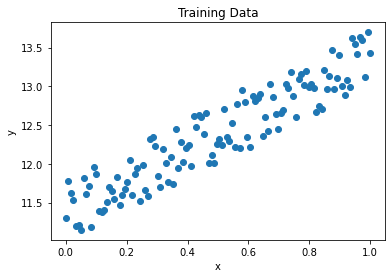

In [2]:
import matplotlib.pyplot as plt

# display training data
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2. Gradient Descent Method

The steps for performing linear regression with gradient descent are as follows:
1. Initialization: We begin by initializing the parameters, $m_{1}$ (slope) and $c_{1}$ (intercept), with random values (close to 1.0).
2. Gradient Descent: In each subsequent iteration, these parameters will be optimized using gradient descent. The goal is to find the minimum of the cost function, which represents the difference between the predicted and actual values. The gradient of the linear function is a vector that contains the partial derivatives with respect to both $m_{1}$ and $c_{1}$. Each iteration updates the parameters by moving them in the opposite direction of their respective gradients (subtracting them), effectively reducing (or minimizing) the error:

$$x_{new} = x_{old} - \text{error} = x_{old} - \eta\nabla f(x) = x_{old} - \eta \left(\frac{∂f}{∂m_{1}}, \frac{∂f}{∂c_{1}}\right),$$

where $\eta$ is the learning rate (typically 0.001 or 0.01) and $\nabla f(x)$ is the gradient vector.

3. Cost Function & Partial Derivatives: For linear regression we commonly use mean squared error (or MSE) as a cost function:

$$MSE = \frac{1}{N} \sum_{i=1}^{N}\left(y_{i} - \hat{y_{i}}\right)^2.$$

The partial derivatives of the cost function with respect to the approximated parameters (slope and intercept) are given by:

$$\frac{∂MSE}{∂m_{1}} = -\frac{2}{N} \sum_{i=1}^{N} - x_{i}\left(y_{i} - \hat{y_{i}}\right) = -\frac{2}{N} \sum_{i=1}^{N} - x_{i}(y_{i} - (m_{1}x_{i} + c_{1})),$$

$$\frac{∂MSE}{∂c_{1}} = -\frac{2}{N} \sum_{i=1}^{N} - \left(y_{i} - \hat{y_{i}}\right) = -\frac{2}{N} \sum_{i=1}^{N} - (y_{i} - (m_{1}x_{i} + c_{1})),$$

where $y_{i}$ is the true or actual value, $\hat{y_{i}}$ is the estimated value, and $N$ is the number of data points (instances). These gradients are then used to update the parameters $m_{1}$ and $c_{1}$ in gradient descent:

$$m_{new} = m_{1} - \eta \frac{∂MSE}{∂m_{1}},$$

$$c_{new} = c_{1} - \eta \frac{∂MSE}{∂c_{1}}.$$

Even with a smaller learning rate, the gradients might still explode if they become too large during the update. Gradient clipping can help by limiting the magnitude of the gradients before applying the update.

4. Convergence: We repeat until the updates to $m_{1}$ and $c_{1}$ become negligible (i.e., the change in values is very small), indicating that the parameters have converged to their optimal values.
5. Evaluation: The performance of the model is evaluated using basic metrics.

In [3]:
# evaluation metrics
def compute_metrics(y_true, y_pred):
    # mean squared error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)
    
    # mean absolute error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # R-squared (R²)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rss = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (rss / tss)
    
    return mse, mae, r2

Iteration 500:
MSE = 0.224334, MAE = 0.396816, R² = 0.454110


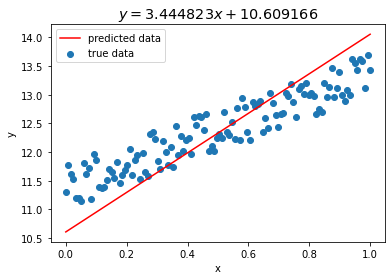

Iteration 1000:
MSE = 0.100272, MAE = 0.255797, R² = 0.756000


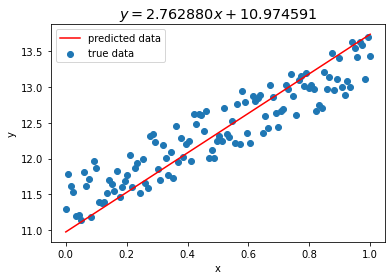

Iteration 1500:
MSE = 0.067705, MAE = 0.218407, R² = 0.835247


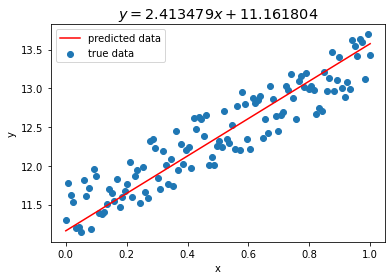

Iteration 2000:
MSE = 0.059157, MAE = 0.210831, R² = 0.856050


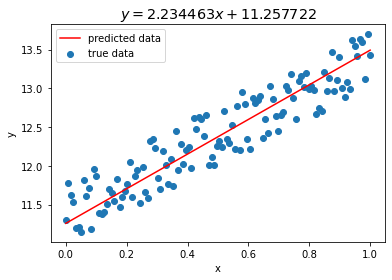

Iteration 2500:
MSE = 0.056912, MAE = 0.208575, R² = 0.861510


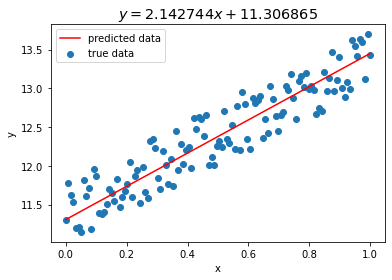

Iteration 3000:
MSE = 0.056323, MAE = 0.208153, R² = 0.862944


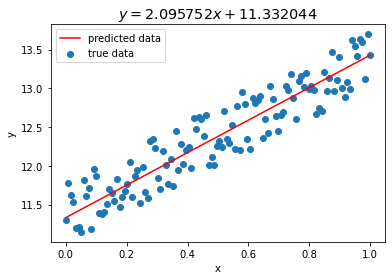

Iteration 3500:
MSE = 0.056169, MAE = 0.208270, R² = 0.863320


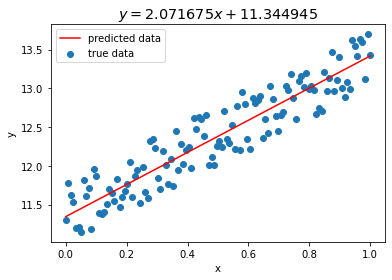

Iteration 4000:
MSE = 0.056128, MAE = 0.208396, R² = 0.863419


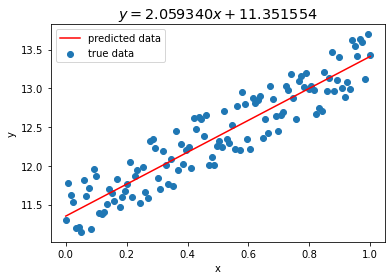

Iteration 4500:
MSE = 0.056117, MAE = 0.208474, R² = 0.863445


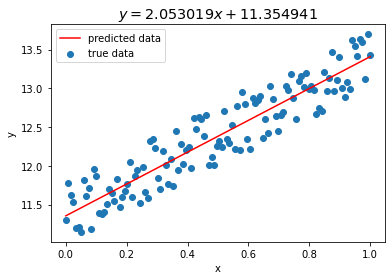

Iteration 5000:
MSE = 0.056115, MAE = 0.208526, R² = 0.863452


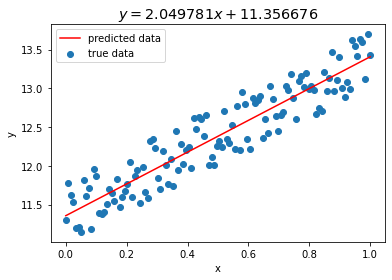

Iteration 5500:
MSE = 0.056114, MAE = 0.208552, R² = 0.863454


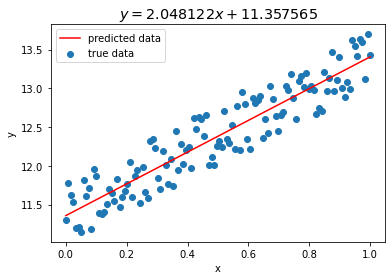

Iteration 6000:
MSE = 0.056114, MAE = 0.208566, R² = 0.863454


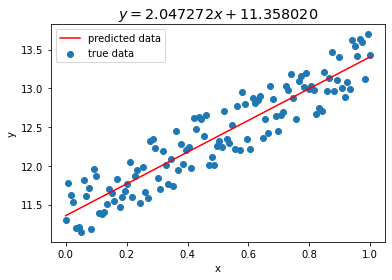

Iteration 6500:
MSE = 0.056114, MAE = 0.208572, R² = 0.863454


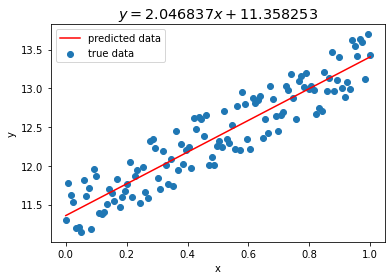

Iteration 7000:
MSE = 0.056114, MAE = 0.208576, R² = 0.863454


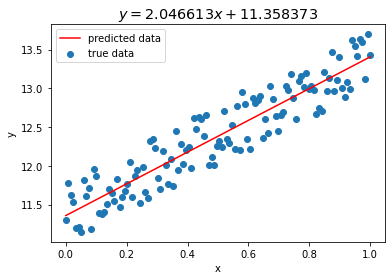

Iteration 7500:
MSE = 0.056114, MAE = 0.208578, R² = 0.863454


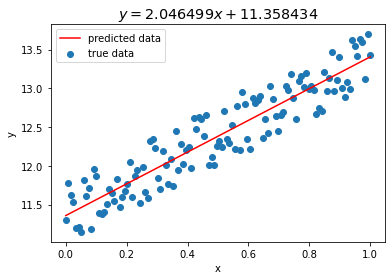

Iteration 8000:
MSE = 0.056114, MAE = 0.208579, R² = 0.863454


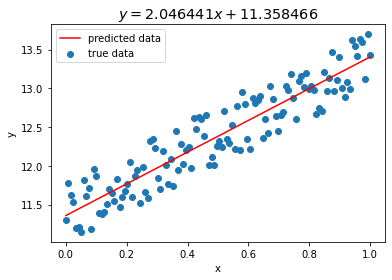

In [4]:
# initialize new slope & intercept
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# hyperparameters: learning rate & number of iterations
learning_rate = 0.01
num_iter = 8_000

for i in range(num_iter):
    y_hat = m1 * x + c1
    
    # cost function's gradient (partial derivatives)
    dm = -(2.0 / N) * np.sum(np.multiply(x, (y - y_hat)))
    dc = -(2.0 / N) * np.sum(y - y_hat)
    
    # gradient clipping to avoid overflow (prevent updates from getting too large)
    dm = np.clip(dm, -1e5, 1e5)
    dc = np.clip(dc, -1e5, 1e5)

    # update parameters
    m1 = m1 - learning_rate * dm
    c1 = c1 - learning_rate * dc
    
    # display progress every n iterations
    if (i + 1) % 500 == 0:
        # predictions
        y_pred_gd = m1 * x + c1
        
        # metrics
        mse_gd, mae_gd, r2_gd = compute_metrics(y, y_pred_gd)
        
        print(f'Iteration {i + 1}:')
        print(f'MSE = {mse_gd:.6f}, MAE = {mae_gd:.6f}, R² = {r2_gd:.6f}')
        
        plt.scatter(x, y, label='true data')
        plt.plot(x, y_pred_gd, color='r', label='predicted data')
        plt.title(f'$y = {m1[0]:.6f} x + {c1[0]:.6f}$', size='x-large')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

With each iteration the trend line gradually fits better to the scatter points. The new $m$ and $c$ are close to the provided values.

### 3. Ordinary Least Squares Method

To implement linear regression using the ordinary least squares (OLS) method instead of gradient descent, we can directly solve for the slope $\theta_{1}$ and intercept $\theta_{0}$ using matrix algebra. In OLS, we calculate the values of $\theta_{1}$ and $\theta_{0}$ that minimize the residual sum of squares (RSS), which represents the degree of variance in the regression model. The RSS is defined as:

$$RSS = \sum_{i=1}^{N}\left(y_{i} - \hat{y_{i}}\right)^2 = \sum_{i=1}^{N}\left(y_{i} - (\theta_{1}x_{i} + \theta_{0})\right)^2,$$

where $\hat{y_{i}}$ are the estimated values.

Steps for linear regression with OLS:

1. Design Matrix: We construct the design matrix $X$, which consists of a column of ones (for the intercept) and a column of the feature values $x$. For multiple features, $X$ will have one column per feature.

$$X = \begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
1 & x_{n}
\end{bmatrix}$$

2. OLS Formulas: The estimated parameters $\theta$ are obtained using the matrix (or normal) equation:

$$\theta = \begin{bmatrix}\theta_{1}\cr\theta_{0}\end{bmatrix} = \left(X^{T} X\right)^{-1}X^{T} y,$$

here, $X$ is the design matrix, $y$ is the vector of observed target values, and $\theta$ is the vector containing both the intercept and slope of the regression line. If we have multiple features, then $\theta$ will be a vector containing the intercept and the slopes for each feature. For simple linear regression, the slope $\theta_{1}$ and intercept $\theta_{0}$ can also be calculated using the formulas:

$$\theta_{1} = \frac{\sum_{i=1}^{N}\left(x_{i} - \overline{x}\right)\left(y_{i} - \overline{y}\right)}{\sum_{i=1}^{N}\left(x_{i} - \overline{x}\right)^2},$$

$$\theta_{0} = \overline{y} + \theta_{1}\overline{x},$$

where $\overline{x}$ and $\overline{y}$ are the means of the feature $x$ and target $y$, respectively. The residual sum of squares (RSS) can also be expressed using matrix notation as:

$$RSS = y^{T}y - y^{T} X \left(X^{T} X\right)^{-1} X^{T} y.$$

3. Evaluation: The performance of the model is evaluated using the same metrics.

Ordinary Least Squares #1:
MSE = 0.056114, MAE = 0.208580, R² = 0.863454


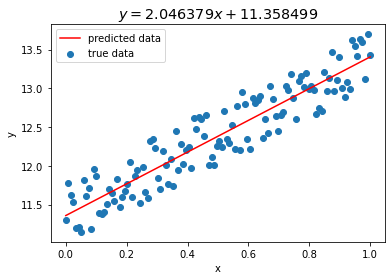

In [5]:
# design matrix X
# add a column of ones to x to account for the intercept (bias term)
X = np.c_[np.ones((N, 1)), x]

# compute the optimal parameters using the OLS formula
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# predictions
y_pred_ols = theta[1] * x + theta[0]

# metrics
mse_ols, mae_ols, r2_ols = compute_metrics(y, y_pred_ols)

print('Ordinary Least Squares #1:')
print(f'MSE = {mse_ols:.6f}, MAE = {mae_ols:.6f}, R² = {r2_ols:.6f}')

plt.scatter(x, y, label='true data')
plt.plot(x, y_pred_ols, color='r', label='predicted data')
plt.title(f'$y = {theta[1]:.6f} x + {theta[0]:.6f}$', size='x-large')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Ordinary Least Squares #2:
MSE = 0.056114, MAE = 0.208580, R² = 0.863454


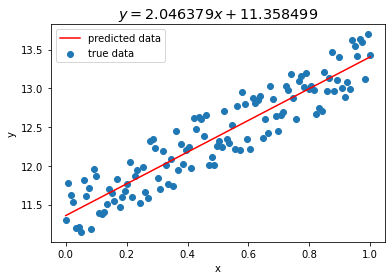

In [6]:
# other solution with OLS
# mean x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# using the formulas to calculate theta_1 and theta_0
numerator = 0.0
denominator = 0.0

for i in range(N):
    numerator += (x[i] - mean_x) * (y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2

# slope & intercept
theta_1 = numerator / denominator
theta_0 = mean_y - (theta_1 * mean_x)

# predictions
y_pred_olss = theta_1 * x + theta_0

# metrics
mse_olss, mae_olss, r2_olss = compute_metrics(y, y_pred_olss)

print('Ordinary Least Squares #2:')
print(f'MSE = {mse_olss:.6f}, MAE = {mae_olss:.6f}, R² = {r2_olss:.6f}')

plt.scatter(x, y, label='true data')
plt.plot(x, y_pred_olss, color='r', label='predicted data')
plt.title(f'$y = {theta_1:.6f} x + {theta_0:.6f}$', size='x-large')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The OLS approach is faster and more efficient for linear regression problems with relatively simple data, whereas gradient descent is used for more complex models or when an analytical solution is not available.

### 4. Scikit-Learn Model

Finally, we will use scikit-learn's LinearRegression method to fit the same data and compare the results with previous versions.

Scikit-learn:
MSE = 0.056114, MAE = 0.208580, R² = 0.863454


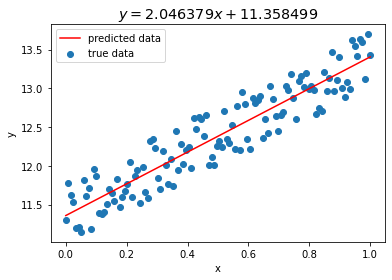

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg = LinearRegression()

# fit the model
# reshape x to (N, 1)
reg.fit(x.reshape(-1, 1), y)

# predictions
y_pred_sk = reg.predict(x.reshape(-1, 1))

# metrics
mse_sk = mean_squared_error(y, y_pred_sk)
mae_sk = mean_absolute_error(y, y_pred_sk)
r2_sk = r2_score(y, y_pred_sk)

print('Scikit-learn:')
print(f'MSE = {mse_sk:.6f}, MAE = {mae_sk:.6f}, R² = {r2_sk:.6f}')

plt.scatter(x, y, label='true data')
plt.plot(x, y_pred_sk, color='r', label='predicted data')
plt.title(f'$y = {reg.coef_[0]:.6f} x + {reg.intercept_:.6f}$', size='x-large')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
# residual sum of squares (RSS)
rss_gd = np.sum((y_pred_gd - y) ** 2)
rss_ols = y @ y.T - y @ X @ np.linalg.inv(X.T @ X) @ X.T @ y.T
rss_olss = np.sum((y_pred_olss - y) ** 2)
rss_sk = np.sum((y_pred_sk - y) ** 2)

from prettytable import PrettyTable

table = PrettyTable(['Model', 'MSE', 'MAE', 'R²', 'RSS', 'Slope', 'Intercept'], align='c')

table.add_row([
    'Gradient Descent',
    round(mse_gd, 6),
    round(mae_gd, 6),
    round(r2_gd, 6),
    round(rss_gd, 6),
    round(m1[0], 6),
    round(c1[0], 6)
])

table.add_row([
    'Ordinary Least Squares #1',
    round(mse_ols, 6),
    round(mae_ols, 6),
    round(r2_ols, 6),
    round(rss_ols, 6),
    round(theta[1], 6),
    round(theta[0], 6)
])

table.add_row([
    'Ordinary Least Squares #2',
    round(mse_olss, 6),
    round(mae_olss, 6),
    round(r2_olss, 6),
    round(rss_olss, 6),
    round(theta_1, 6),
    round(theta_0, 6)
])

table.add_row([
    'Scikit-Learn',
    round(mse_sk, 6),
    round(mae_sk, 6),
    round(r2_sk, 6),
    round(rss_sk, 6),
    round(reg.coef_[0], 6),
    round(reg.intercept_, 6)
])

print(table)

+---------------------------+----------+----------+----------+----------+----------+-----------+
|           Model           |   MSE    |   MAE    |    R²    |   RSS    |  Slope   | Intercept |
+---------------------------+----------+----------+----------+----------+----------+-----------+
|      Gradient Descent     | 0.056114 | 0.208579 | 0.863454 | 6.733636 | 2.046441 | 11.358466 |
| Ordinary Least Squares #1 | 0.056114 | 0.20858  | 0.863454 | 6.733636 | 2.046379 | 11.358499 |
| Ordinary Least Squares #2 | 0.056114 | 0.20858  | 0.863454 | 6.733636 | 2.046379 | 11.358499 |
|        Scikit-Learn       | 0.056114 | 0.20858  | 0.863454 | 6.733636 | 2.046379 | 11.358499 |
+---------------------------+----------+----------+----------+----------+----------+-----------+


Gradient descent is an iterative optimization that updates the parameters by minimizing a cost function (mean squared error) step by step and it is more complex. OLS (ordinary least squares) method is a direct analytical solution that calculates the optimal parameters in one step using matrix operations.

It can be deduced from the above results that our custom-developed models perform as accurately as the scikit-learn model, with only minimal differences in slope and intercept for gradient descent. The differences in the learned parameters are so small that they are practically insignificant. The evaluation metrics are the same. Our custom models are valid and accurate alternatives to the scikit-learn model, with virtually no noticeable difference in performance or output.